In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
def readData(file_name):
  data = pd.read_csv(file_name)
  X = data.drop(['class_type'], axis = 1)
  y = data['class_type']
  return X, y

In [ ]:
def svm(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 0, shuffle = True)
  model = SVC(kernel  = 'linear')
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  print("Train: ", accuracy_score(y_train, y_train_pred))

  y_test_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_test_pred)
  print("Test Score: ", accuracy)
  return y_test_pred, y_test


In [ ]:
X, y = readData('/content/dataset.csv')
y_test_pred, y_test = svm(X,y)

Train:  1.0
Test Score:  1.0


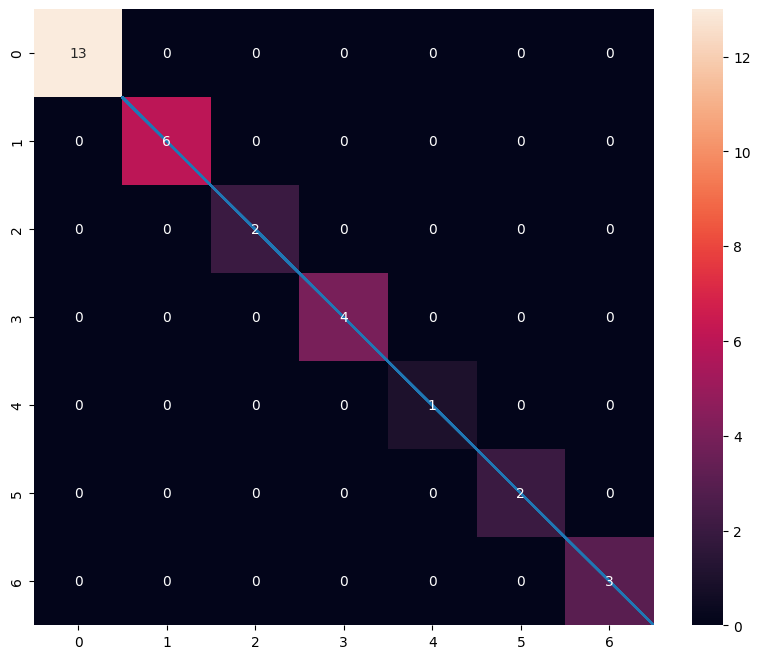

In [ ]:
plt.figure(figsize = (10, 8), dpi = 100)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True)
plt.plot(y_test, y_test_pred)